In [1]:

#各ライブラリのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

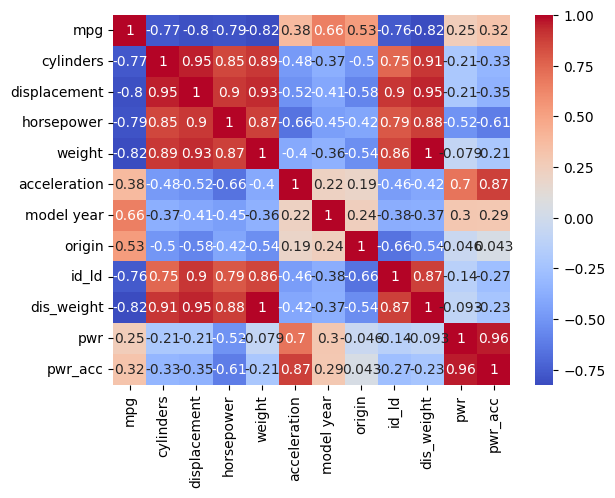

In [2]:
df_train = pd.read_csv('データ/train.tsv' , sep = '\t')
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_train_test = pd.concat([df_train , df_test] , axis =0)
df_train_test['horsepower'] = df_train_test['horsepower'].replace({'?':np.nan}).astype(float)
#df_train['model year'] = df_train['model year'].replace({73:1,70:2,72:3,75:4,76:5,71:6,77:7,78:8,79:9,74:10,82:11,81:12,80:13})
df_train['model year'] = df_train['model year'].replace({73:70,70:71,72:72,75:73,76:74,71:75,77:76,78:77,79:78,74:79,82:80,81:81,80:82})
#シリンダー(気筒数)で割ることで相関を下げる
df_train['id_ld'] = df_train['displacement']/df_train['cylinders']
#dis_weight
df_train['dis_weight'] = df_train['displacement'] + df_train['weight']

df_train.iloc[24 , 4] = df_train_test[df_train_test['displacement'] == 151]['horsepower'].mean()
#renault 18
df_train.iloc[113 , 4] = df_train_test[(98 <= df_train_test['displacement']) & (df_train_test['displacement']<= 102)]['horsepower'].mean()
#renault lecar deluxe
df_train.iloc[145 , 4] = df_train_test[df_train_test['displacement'] == 85]['horsepower'].mean()
#ford pintot
df_train.iloc[175 , 4] = df_train_test[df_train_test['car name'] == 'ford pinto']['horsepower'].mean()
#pwr
df_train['pwr'] = df_train['weight'].astype(float)/df_train['horsepower'].astype(float)
#pwr_acc
df_train['pwr_acc'] = df_train['pwr'] + df_train['acceleration']
df_train_drop = df_train.drop([ 'id' , 'car name' ,] , axis = 1)
#相関係数のヒートマップ
sns.heatmap(df_train_drop.corr() , cmap='coolwarm' , annot=True)
plt.show()
#year降りなおした方が相関係数は上がる
#多重共線性はr>0.95

In [3]:
#前処理
#データ読み込み
df_train = pd.read_csv('データ/train.tsv' , sep = '\t')
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_train_test = pd.concat([df_train , df_test] , axis =0)
#print(df_train_test[df_train_test['horsepower'] == "?"])
df_train_test['horsepower'] = df_train_test['horsepower'].replace({'?':np.nan}).astype(float)
df_train[df_train['horsepower'].isnull()]#欠損値を含むカラムの抽出
#欠損値補完
#amc concord dl
df_train_test.iloc[24 , 4] = df_train_test[df_train_test['displacement'] == 151]['horsepower'].mean()
#renault 18
df_train_test.iloc[113 , 4] = df_train_test[(98 <= df_train_test['displacement']) & (df_train_test['displacement']<= 102)]['horsepower'].mean()
#renault lecar deluxe
df_train_test.iloc[145 , 4] = df_train_test[df_train_test['displacement'] == 85]['horsepower'].mean()
#ford pinto
df_train_test.iloc[175 , 4] = df_train_test[df_train_test['car name'] == 'ford pinto']['horsepower'].mean()
#ford maverick
df_train_test.loc[70 , 'horsepower'] = df_train_test[df_train_test['car name'] == "ford maverick"]['horsepower'].mean()
#ford mustang cobra
df_train_test.loc[112 , 'horsepower'] = df_train_test[df_train_test['displacement'] == 140]['horsepower'].mean()

#pwrカラムの作成
#df_train_test['pwr'] = df_train_test['weight']/df_train_test['horsepower']

#id_ldカラム作成
#df_train['id_ld'] = df_train['displacement']/ df_train['cylinders']

#dis_weightカラムの作成
df_train_test['dis_weight'] = df_train_test['displacement'] + df_train_test['weight']

#年代の番号降り直し
#df_train_test['model year'] = df_train_test['model year'].replace({73:1,70:2,72:3,75:4,76:5,71:6,77:7,78:8,79:9,74:10,82:11,81:12,80:13})
#年代降り直し(70~82)
#df_train_test['model year'] = df_train_test['model year'].replace({73:70,70:71,72:72,75:73,76:74,71:75,77:76,78:77,79:78,74:79,82:80,81:81,80:82})
#df_train_test['model_year_']=df_train_test['model year']
#print(df_train_test['model year'].head())

#メーカーカラム作成
df_split = df_train_test['car name'].str.split(expand = True)#str.split('')で文字列を''で分割(入力しないと空白で分割される)
df_train_test['manufacturers name'] = df_split.iloc[:, 0]
df_train_test['manufacturers name'] = df_train_test['manufacturers name'].replace({"toyouta":"toyota", "vw":"volkswagen", "vokswagen":"volkswagen",  "chevroelt":"chevrolet" ,  "chevy":"chevrolet","mercury":"ford", "datsun":"nissan", "maxda":"mazda",  "mercedes":"mercedes-benz"})#カラム名の修正
#国とメーカーカラムの結合
df_train_test['manufacturers_country'] = df_train_test['manufacturers name'] + df_train_test['origin'].astype(str) 
#メーカーとmodel yearの結合
#df_train_test['manufacturers_year'] = df_train_test['manufacturers name'] + df_train_test['model year'].astype(str)
#国とmodel yearの結合
#df_train_test['origin_year'] =df_train_test['origin'].astype(str) + _ + df_train_test['model year'].astype(str)
#3つとも結合
#df_train_test['manufacturers_country_year'] = df_train_test['manufacturers name'] + df_train_test['origin'].astype(str) + df_train_test['model year'].astype(str)
#エンコーディング
df_number = pd.get_dummies(df_train_test , columns = [  'manufacturers_country',
                                                        #'manufacturers_country_year'
                                                        #'manufacturers name' ,
                                                        #'model year' ,
                                                        #'manufacturers_year',
                                                        #'origin'
                                                      ] , dtype = int)

df_train = df_number.iloc[:199 , :]
df_test = df_number.iloc[199: , :]

#学習
#目的変数の分離
X = df_train.drop([ 'id' , 'car name' , 'mpg' , 
                   'cylinders',
                   'weight',
                    'manufacturers name' , 
                    #'model year' , 
                    #'origin',
                    'displacement'
                    ] , axis = 1)
y = df_train['mpg']
features_test = df_test.drop([ 'id' , 'car name' , 'mpg' , 
                              'cylinders',
                              'weight',
                               'manufacturers name' , 
                               #'model year' , 
                               #'origin',
                               'displacement'
                              ] , axis = 1)



In [4]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(X)
df_train_std= pd.DataFrame(scaler.transform(X), columns = X.columns)
df_test_std = pd.DataFrame(scaler.transform(features_test), columns = features_test.columns)


#学習
#svmのimport
from sklearn import svm
#回帰モデルの呼び出し
model = svm.SVR()
model.fit(X , y)
#予測
df_pred = pd.DataFrame(model.predict(features_test))

#print(df_pred[df_pred <= 0])
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')

df_pred = pd.merge(df_test['id'].astype(int) , df_pred , how = 'outer' , right_index = True , left_index=True)

#評価
#multiple regression analysisの頭文字をとってMRA_sample_submit.csv
df_pred.to_csv('SVM_sample_submit.csv' , header = False , index = False)

In [11]:
#特徴量重要度

feature_importances = model.coef_ * 100

# 特徴の数
num_features = len(feature_importances)

# カラム名と重要度を対応させる
feature_importance_dict = dict(zip(X.columns, feature_importances))

# 重要度の高い順にソート
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# 可視化
plt.rcParams["axes.axisbelow"] = True
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), [item[1] for item in sorted_feature_importance], align='center')
plt.xticks(np.arange(0,11,1))
plt.yticks(range(len(sorted_feature_importance)), [item[0] for item in sorted_feature_importance], rotation=0)
plt.xlabel('importance(%)', fontsize=13)
plt.title('importance of characteristic quantity', fontsize=15)
plt.grid(axis="x", linestyle="--")
plt.show()

AttributeError: coef_ is only available when using a linear kernel